In [28]:
import os
import os.path as op
import boto3
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import skimage.io
import skimage.filters
from skimage.filters import try_all_threshold
from diff_classifier import aws
import matplotlib.image as mpimg
from scipy import ndimage as ndi
from skimage.transform import resize

In [24]:
s3_folder = '11_16_18_MPT_in_PNNs'
s3_filename = 'HBSS_vid_3_z_stack_MaxIP.tif'
s3_bucket = 'mckenna.data'

In [25]:
aws.download_s3('{}/{}'.format(s3_folder,s3_filename), s3_filename, bucket_name = s3_bucket)

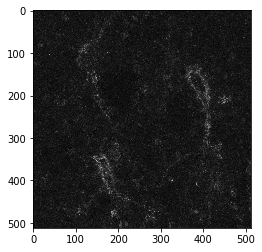

In [26]:
img = skimage.io.imread('HBSS_vid_3_z_stack_MaxIP.tif')
img.shape
imgplot = plt.imshow(img[0, :, :], cmap='gray')
plt.show()

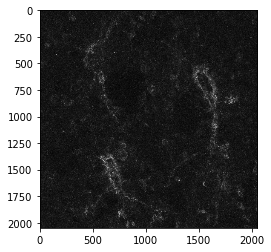

In [31]:
img_scaled = resize(img[0,:,:],(2048,2048))
scaled_plot = plt.imshow(img_scaled, cmap='gray')
plt.show()

skimage.filters.thresholding.threshold_yen
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li


(<Figure size 1440x1296 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x11e25b6d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11de9aef0>], dtype=object))

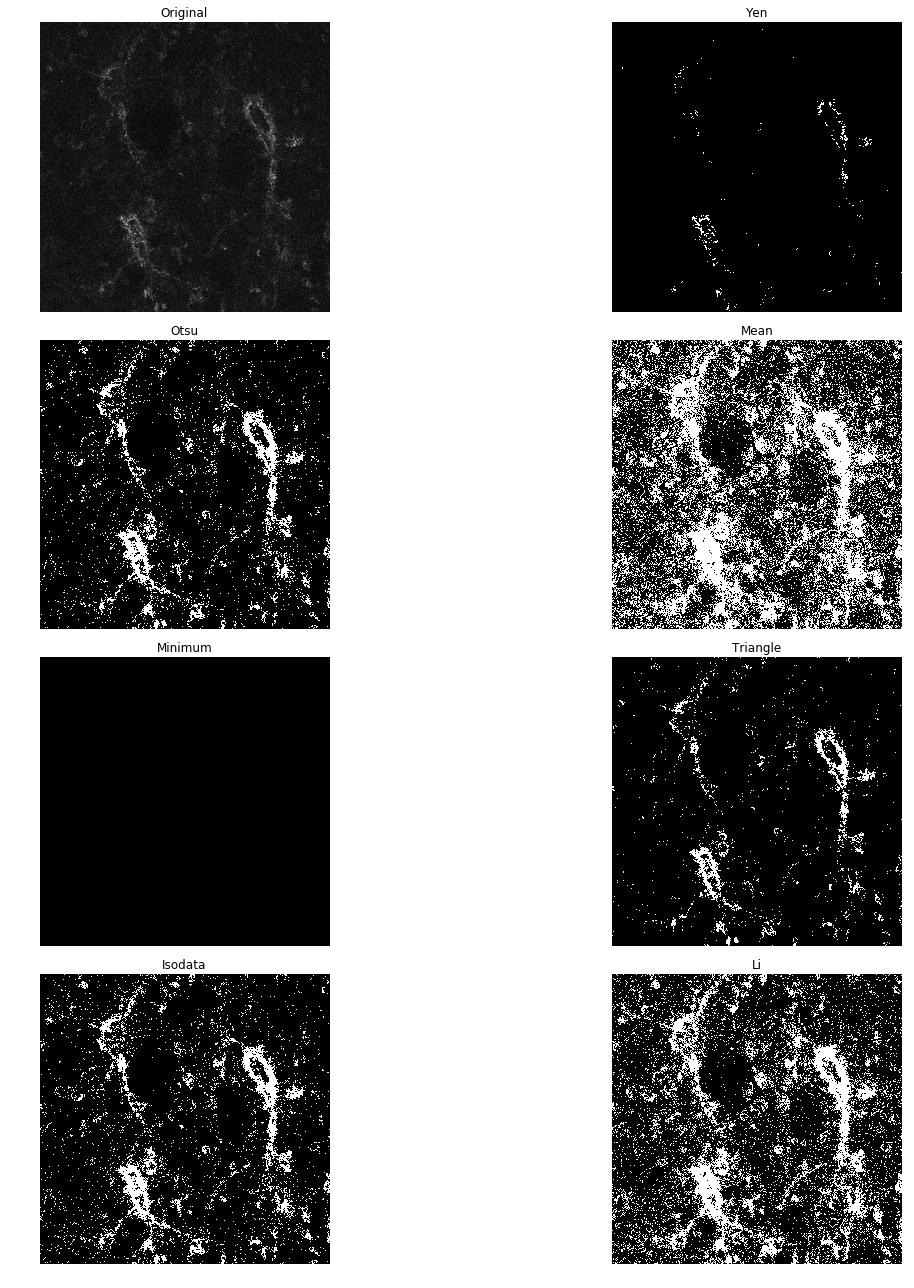

In [32]:
try_all_threshold(img_scaled, figsize=(20,18))

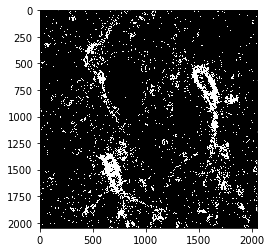

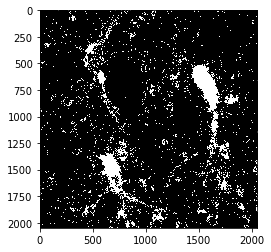

In [33]:
# This performs threshold without using a preprocessing median filtering technique

thresh = skimage.filters.threshold_otsu(img_scaled)
pnnbinary = img_scaled > thresh
binaryplot = plt.imshow(pnnbinary, cmap='gray')
plt.show()

pnnbinary_filled = ndi.binary_fill_holes(pnnbinary)
binary_filledplot = plt.imshow(pnnbinary_filled, cmap='gray')
plt.show()

In [ ]:
print(img[0,:,:])
print(pnnbinary)

In [34]:
from skimage import morphology

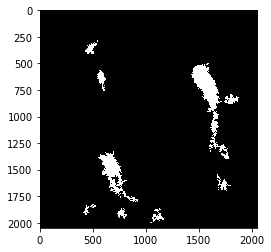

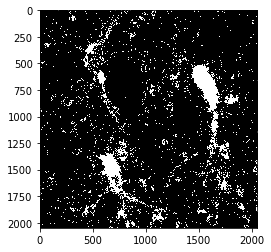

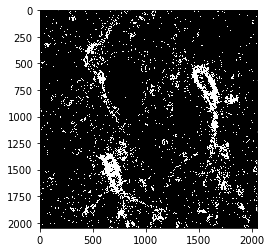

In [44]:
pnn_clean = morphology.remove_small_objects(pnnbinary_filled, min_size=3000)
pnn_clean_plot = plt.imshow(pnn_clean, cmap='gray')
plt.show()
binary_filledplot = plt.imshow(pnnbinary_filled, cmap='gray')
plt.show()
binaryplot = plt.imshow(pnnbinary, cmap='gray')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

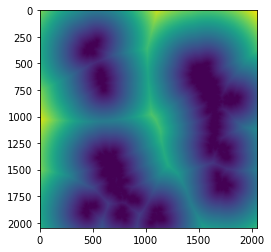

In [45]:
from scipy.ndimage.morphology import distance_transform_edt as Euclidean

euc_img = Euclidean(1-pnn_clean) #1- represents going outwards from the cells
plt.imshow(euc_img)
plt.show

In [46]:
euc_img
euc_img.min()

0.0

In [47]:
import pandas as pd
bucket = 'mckenna.data'
remote_folder = '11_16_18_MPT_in_PNNs'
prefix = 'HBSS_vid_3'
filename = "msd_{}.csv".format(prefix)
aws.download_s3(remote_folder+'/'+filename, filename, bucket_name=bucket)
local_name = filename
merged = pd.read_csv(local_name)

In [48]:
merged[0:10]

,Unnamed: 0,Frame,Track_ID,X,Y,MSDs,Gauss,Quality,SN_Ratio,Mean_Intensity
0,0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
1,1,1.0,0.0,NaN,NaN,4.001641,2.396512,NaN,NaN,NaN
2,2,2.0,0.0,NaN,NaN,6.834146,1.681477,NaN,NaN,NaN
3,3,3.0,0.0,NaN,NaN,7.851303,1.606836,NaN,NaN,NaN
4,4,4.0,0.0,NaN,NaN,8.840694,1.439491,NaN,NaN,NaN
5,5,5.0,0.0,NaN,NaN,11.364362,1.123226,NaN,NaN,NaN
6,6,6.0,0.0,NaN,NaN,12.743154,1.025701,NaN,NaN,NaN
7,7,7.0,0.0,NaN,NaN,14.829385,0.891548,NaN,NaN,NaN
8,8,8.0,0.0,NaN,NaN,15.837694,0.879375,NaN,NaN,NaN
9,9,9.0,0.0,NaN,NaN,16.595764,0.835129,NaN,NaN,NaN


In [13]:
merged.X.max()

2047.0

In [15]:
euc_img.shape

(512, 512)